<a href="https://colab.research.google.com/github/pchikode/Fitbit-Data-Analysis/blob/main/Project_BBC_News_Analysis_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('bbc-news-data.csv', sep='\t')

In [ ]:
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
df.iloc[0]['content']

' Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\'s existing customers for high-

In [ ]:
df.category.value_counts()

,count
category,
sport,511
business,510
politics,417
tech,401
entertainment,386


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = set(stopwords.words('english'))

In [ ]:
set(list(stopwords)[0:15])

{'against',
 "didn't",
 'doesn',
 'down',
 'having',
 'him',
 'himself',
 'if',
 'isn',
 'it',
 'me',
 'shouldn',
 'their',
 'themselves',
 've'}

In [ ]:
len(stopwords)

198

In [ ]:
contents_clean = []
for content_clean in df.content:
    for word in stopwords:
        token = " " + word + " "
        content_clean = content_clean.replace(token, " ")
    contents_clean.append(content_clean)

In [ ]:
df['content_clean'] = np.array(contents_clean)

In [ ]:
df.iloc[0]['content_clean']

' Quarterly profits US media giant TimeWarner jumped 76% $1.13bn (£600m) three months December, $639m year-earlier.  The firm, one biggest investors Google, benefited sales high-speed internet connections higher advert sales. TimeWarner said fourth quarter sales rose 2% $11.1bn $10.9bn. Its profits buoyed one-off gains offset profit dip Warner Bros, less users AOL.  Time Warner said Friday owns 8% search-engine Google. But internet business, AOL, mixed fortunes. It lost 464,000 subscribers fourth quarter profits lower preceding three quarters. However, company said AOL\'s underlying profit exceptional items rose 8% back stronger internet advertising revenues. It hopes increase subscribers offering online service free TimeWarner internet customers try sign AOL\'s existing customers high-speed broadband. TimeWarner also restate 2000 2003 results following probe US Securities Exchange Commission (SEC), close concluding.  Time Warner\'s fourth quarter profits slightly better analysts\' exp

In [ ]:
len(df.content_clean[2224])

11410

<Axes: xlabel='count', ylabel='category'>

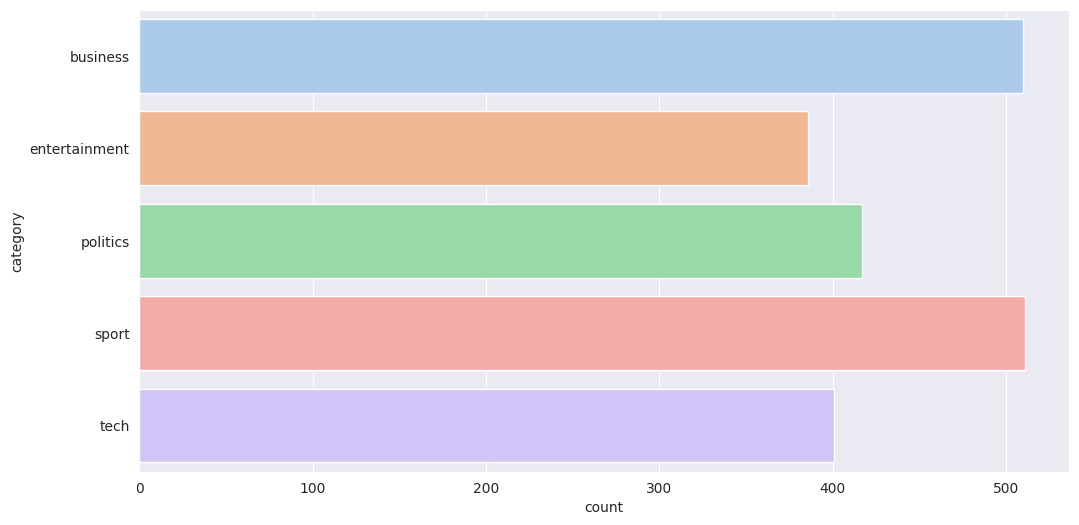

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df.category, palette='pastel')

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
heading_sport = df[df["category"] == "sport"]["title"]
collapsed_heading_sport = heading_sport.str.cat(sep=' ')

heading_business = df[df["category"] == "business"]["title"]
collapsed_heading_business = heading_business.str.cat(sep=' ')

heading_politics = df[df["category"] == "politics"]["title"]
collapsed_heading_politics = heading_politics.str.cat(sep=' ')

heading_tech = df[df["category"] == "tech"]["title"]
collapsed_heading_tech = heading_tech.str.cat(sep=' ')

heading_entertainment = df[df["category"] == "entertainment"]["title"]
collapsed_heading_entertainment = heading_entertainment.str.cat(sep=' ')

In [ ]:
collapsed_heading_sport

'Claxton hunting first major medal O\'Sullivan could run in Worlds Greene sets sights on world title IAAF launches fight against drugs Dibaba breaks 5,000m world record Isinbayeva claims new world best O\'Sullivan commits to Dublin race Hansen \'delays return until 2006\' Off-colour Gardener storms to win Collins to compete in Birmingham Radcliffe yet to answer GB call Edwards tips Idowu for Euro gold Kenya lift Chepkemei\'s suspension McIlroy aiming for Madrid title UK Athletics agrees new kit deal Verdict delay for Greek sprinters Call for Kenteris to be cleared Merritt close to indoor 400m mark London hope over Chepkemei Edwards tips Idowu for Euro gold Chepkemei hit by big ban Holmes secures comeback victory Greek pair attend drugs hearing Chepkemei joins Edinburgh line-up El Guerrouj targets cross country Collins appeals against drugs ban Holmes feted with further honour Campbell to extend sprint career Isinbayeva heads for Birmingham 2004: An Irish Athletics Year Sprinter Walker 

Word Cloud for sport


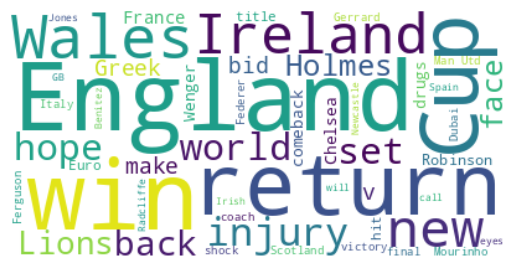



Word Cloud for business


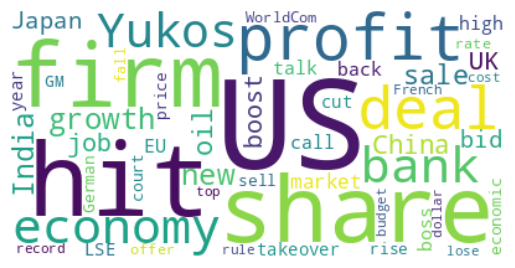



Word Cloud for politics


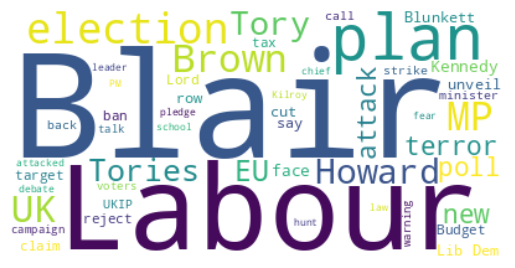



Word Cloud for tech


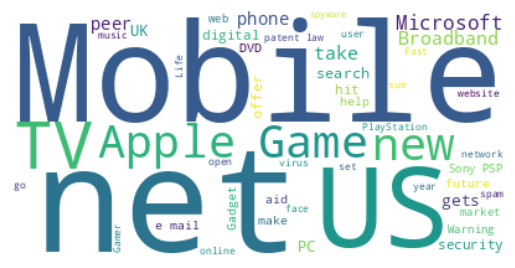



Word Cloud for entertainment


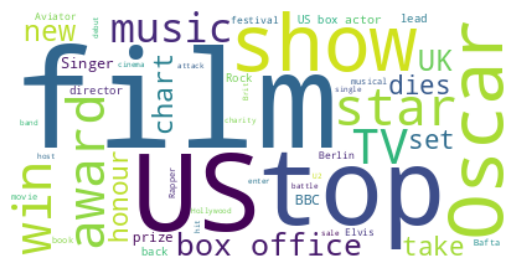

In [ ]:
# Create stopword list
stopwords = set(STOPWORDS)

# Word Cloud for sport
print("Word Cloud for sport")
wordcloud_sport = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(collapsed_heading_sport)
plt.imshow(wordcloud_sport, interpolation='bilinear')
plt.axis('off')
plt.show()
print('\n')

# Word Cloud for business
print("Word Cloud for business")
wordcloud_business = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(collapsed_heading_business)
plt.imshow(wordcloud_business, interpolation='bilinear')
plt.axis('off')
plt.show()
print('\n')
# Word Cloud for politics
print("Word Cloud for politics")
wordcloud_politics = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(collapsed_heading_politics)
plt.imshow(wordcloud_politics, interpolation='bilinear')
plt.axis('off')
plt.show()
print('\n')
# Word Cloud for tech
print("Word Cloud for tech")
wordcloud_tech = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(collapsed_heading_tech)
plt.imshow(wordcloud_tech, interpolation='bilinear')
plt.axis('off')
plt.show()
print('\n')
# Word Cloud for entertainment
print("Word Cloud for entertainment")
wordcloud_entertainment = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(collapsed_heading_entertainment)
plt.imshow(wordcloud_entertainment, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
X = list(df.content_clean)
y = list(df.category)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, shuffle = True)

In [ ]:
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print("Frequency of unique labels in the train set:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique labels in the train set:
[['business' 'entertainment' 'politics' 'sport' 'tech']
 ['395' '314' '341' '409' '321']]


In [ ]:
unique_elements_test, counts_elements_test = np.unique(y_test, return_counts=True)
print("Frequency of unique labels in the test set:")
print(np.asarray((unique_elements_test, counts_elements_test)))

Frequency of unique labels in the test set:
[['business' 'entertainment' 'politics' 'sport' 'tech']
 ['115' '72' '76' '102' '80']]


In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1780
1780
445
445


## Transforming Article Text to Feature Vector

In [ ]:
vocab_size = 15000
embedding_dim = 32
max_length = 256
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [ ]:
X_train_sqncs = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sqncs, padding=padding_type, maxlen=max_length)

In [ ]:
X_test_sqncs = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sqncs, padding=padding_type, maxlen=max_length)

In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(df.category)
label_index = label_tokenizer.word_index

y_train_label_sqncs = np.array(label_tokenizer.texts_to_sequences(y_train))
y_test_label_sqncs = np.array(label_tokenizer.texts_to_sequences(y_test))

In [ ]:
len(word_index)

28831

In [ ]:
dict(list(word_index.items())[0:15]) #showing only the first 15 elements of the word_index dictionary

{'<OOV>': 1,
 'the': 2,
 'said': 3,
 'i': 4,
 'mr': 5,
 'would': 6,
 'also': 7,
 'it': 8,
 'year': 9,
 'people': 10,
 'new': 11,
 'but': 12,
 'us': 13,
 'one': 14,
 'he': 15}

In [ ]:
label_index

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

## Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 35
history = model.fit(X_train_padded, y_train_label_sqncs, epochs=num_epochs)

Epoch 1/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3032 - loss: 1.7131
Epoch 2/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5206 - loss: 1.4352
Epoch 3/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7313 - loss: 1.0564
Epoch 4/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8837 - loss: 0.6038
Epoch 5/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9728 - loss: 0.3298
Epoch 6/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9804 - loss: 0.1869
Epoch 7/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9899 - loss: 0.1156
Epoch 8/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9954 - loss: 0.0805
Epoch 9/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9989 - loss: 0.0506
Epoch 10/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9995 - loss: 0.0384
Epoch 11/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9989 - loss: 0.0294
Epoch 12/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9975 - l

In [ ]:
y_pred = model.predict(X_test_padded)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
X_test_padded

array([[  101, 13341,     3, ...,   168,   528,   148],
       [    2,   149,   552, ...,     0,     0,     0],
       [   44,   512, 11544, ...,     0,     0,     0],
       ...,
       [  503,   402,   111, ...,     0,     0,     0],
       [    2,    11,   517, ...,     0,     0,     0],
       [    1,  1736,   171, ...,     0,     0,     0]], dtype=int32)

In [ ]:
y_pred

array([[6.4932513e-09, 6.4167374e-08, 9.9999660e-01, 9.1298079e-07,
        7.3748339e-07, 1.5328928e-06],
       [7.0450074e-07, 1.5902968e-05, 9.9967742e-01, 2.8517537e-04,
        9.9942135e-06, 1.0793169e-05],
       [2.9509781e-07, 9.9997252e-01, 5.1012694e-07, 3.3890010e-06,
        1.3285511e-08, 2.3318593e-05],
       ...,
       [4.9116848e-09, 3.5553194e-06, 1.3720358e-04, 9.9985325e-01,
        2.9450161e-06, 2.9284615e-06],
       [3.0534427e-08, 6.7208163e-07, 1.1791498e-06, 1.3953712e-07,
        4.6543949e-04, 9.9953258e-01],
       [1.7160248e-08, 4.3299410e-04, 9.9859363e-01, 5.5276841e-04,
        2.2525672e-05, 3.9823944e-04]], dtype=float32)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_content(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

reverse_label_index = dict([(value, key) for (key, value) in label_index.items()])

def decode_labels(text):
    text = np.array([text])
    return ' '.join([reverse_label_index.get(i, '?') for i in text])

In [ ]:
decode_content(X_test_padded[20])

"australia raising benchmark interest rate highest level four years despite signs slowdown country's economy the reserve bank australia lifted interest rates 0 25 5 5 first upwards move year however shortly bank made decision new figures showed fall economic growth last quarter the bank said acted curb inflation move criticised analysts the rate hike first since december 2003 well flagged advance however opposition parties analysts said move ill <OOV> given data showing australian economy grew 0 1 october december 1 5 annual basis the figures representing decline 0 2 growth gdp seen july september market expectations consumer spending remains strong however bank concerned growing inflationary pressures over recent months become increasingly clear remaining spare capacity labour goods markets becoming rather limited said ian macfarlane governor reserve bank at 2 6 inflation remains within bank's 2 3 target range however exports declined second half 2004 fuelling rise country's current a

In [ ]:
y_pred[20]

array([2.9660321e-09, 2.4216064e-07, 9.9999899e-01, 4.2239645e-07,
       4.3975486e-08, 1.8340063e-07], dtype=float32)

In [ ]:
decode_labels(y_pred[20].argmax())

'business'